##### 7.2 Assignment: Create Optimal Hotel Recommendationsr
##### Name: Prashant Raghuwanshi
##### Date: 1/30/2022
##### Course: DSC630-T301 Predictive Analytics (2223-1)

In [47]:
##### Import common Data preparation libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
##### read source expedia_user_activity_log_train file into user_train_df dataframe
user_train_df = pd.read_csv(r"split_expedia_usr_log_train.csv")
##### display firt 5 records
user_train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [3]:
##### read source expedia_user_activity_log_test file into user_test_df dataframe
user_test_df = pd.read_csv(r"expedia_user_activity_log_test.csv")
##### display firt 5 records
user_test_df.head(5)

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [4]:
##### read source expedia_destinations file into destinations_df dataframe
destinations_df = pd.read_csv(r"expedia_destinations.csv")
##### display firt 5 records
destinations_df.head(5)

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [5]:
user_train_df.shape

(9999999, 24)

In [6]:
user_test_df.shape

(2528243, 22)

In [7]:
# Source file is too big and i am getting performance issue due to less computing power of my pc. 
# so i am splitting the train daframe to half

In [8]:
user_train_df1 = user_train_df.head(50000)
user_test_df1 = user_test_df.head(10000)

In [9]:
user_train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  50000 non-null  object 
 1   site_name                  50000 non-null  int64  
 2   posa_continent             50000 non-null  int64  
 3   user_location_country      50000 non-null  int64  
 4   user_location_region       50000 non-null  int64  
 5   user_location_city         50000 non-null  int64  
 6   orig_destination_distance  30998 non-null  float64
 7   user_id                    50000 non-null  int64  
 8   is_mobile                  50000 non-null  int64  
 9   is_package                 50000 non-null  int64  
 10  channel                    50000 non-null  int64  
 11  srch_ci                    49971 non-null  object 
 12  srch_co                    49971 non-null  object 
 13  srch_adults_cnt            50000 non-null  int

In [10]:
user_test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   date_time                  10000 non-null  object 
 2   site_name                  10000 non-null  int64  
 3   posa_continent             10000 non-null  int64  
 4   user_location_country      10000 non-null  int64  
 5   user_location_region       10000 non-null  int64  
 6   user_location_city         10000 non-null  int64  
 7   orig_destination_distance  5893 non-null   float64
 8   user_id                    10000 non-null  int64  
 9   is_mobile                  10000 non-null  int64  
 10  is_package                 10000 non-null  int64  
 11  channel                    10000 non-null  int64  
 12  srch_ci                    10000 non-null  object 
 13  srch_co                    10000 non-null  obje

Convert it into numerical values which will be relevant to our model.
date_time
srch_ci
srch_co

In [11]:
# Function to convert date object into relevant attributes
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    # For hotel check-in
    # Month, Year, Day
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [12]:
convert_date_into_days(user_train_df1)

<ipython-input-11-c09261cabfdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['srch_ci'] = pd.to_datetime(df['srch_ci'])
<ipython-input-11-c09261cabfdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['srch_co'] = pd.to_datetime(df['srch_co'])
<ipython-input-11-c09261cabfdb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [13]:
convert_date_into_days(user_test_df1)

<ipython-input-11-c09261cabfdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['srch_ci'] = pd.to_datetime(df['srch_ci'])
<ipython-input-11-c09261cabfdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['srch_co'] = pd.to_datetime(df['srch_co'])
<ipython-input-11-c09261cabfdb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [14]:
#Fill nan with the day which has max occurence
user_train_df1['Cin_day'] = user_train_df1['Cin_day'].fillna(26.0)
user_train_df1['Cin_month'] = user_train_df1['Cin_month'].fillna(8.0)
user_train_df1['Cin_year'] = user_train_df1['Cin_year'].fillna(2014.0)
user_train_df1['stay_dur'] = user_train_df1['stay_dur'].fillna(1.0)
user_train_df1['no_of_days_bet_booking'] = user_train_df1['no_of_days_bet_booking'].fillna(0.0)

<ipython-input-14-9963c615d66f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_train_df1['Cin_day'] = user_train_df1['Cin_day'].fillna(26.0)
<ipython-input-14-9963c615d66f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_train_df1['Cin_month'] = user_train_df1['Cin_month'].fillna(8.0)
<ipython-input-14-9963c615d66f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [15]:
#Fill nan with the day which has max occurence
user_test_df1['Cin_day'] = user_train_df1['Cin_day'].fillna(26.0)
user_test_df1['Cin_month'] = user_train_df1['Cin_month'].fillna(8.0)
user_test_df1['Cin_year'] = user_train_df1['Cin_year'].fillna(2014.0)
user_test_df1['stay_dur'] = user_train_df1['stay_dur'].fillna(1.0)
user_test_df1['no_of_days_bet_booking'] = user_train_df1['no_of_days_bet_booking'].fillna(0.0)

<ipython-input-15-a8a99e16048e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_test_df1['Cin_day'] = user_train_df1['Cin_day'].fillna(26.0)
<ipython-input-15-a8a99e16048e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_test_df1['Cin_month'] = user_train_df1['Cin_month'].fillna(8.0)
<ipython-input-15-a8a99e16048e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [16]:
# Fill average values in place for nan, fill with mean
user_train_df1['orig_destination_distance'].fillna(user_train_df1['orig_destination_distance'].mean(), inplace=True)

C:\Users\21313711\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
# Fill average values in place for nan, fill with mean
user_test_df1['orig_destination_distance'].fillna(user_test_df1['orig_destination_distance'].mean(), inplace=True)

In [18]:
## Remove datetime object from the dataset
#columns to remove
columns = ['date_time', 'srch_ci', 'srch_co']
user_train_df1.drop(columns=columns,axis=1,inplace=True)
user_test_df1.drop(columns=columns,axis=1,inplace=True)

C:\Users\21313711\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

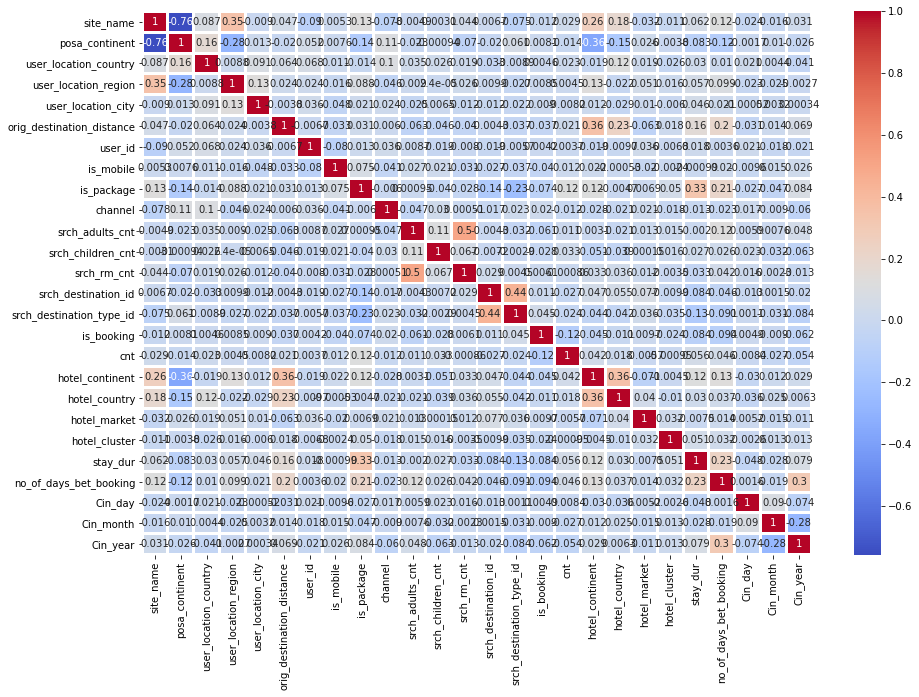

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(user_train_df1.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [20]:
# merge destination id dataframe with user trian df
user_train_df2 = pd.merge(user_train_df1, destinations_df, on = "srch_destination_id", how='left')

In [21]:
# merge destination id dataframe with user test df
user_test_df2 = pd.merge(user_test_df1, destinations_df, on = "srch_destination_id", how='left')

In [22]:
# Fill average values in place for nan, fill with mean
user_train_df2['d63'].fillna(user_train_df2['d63'].mean(), inplace=True)
user_train_df2['d86'].fillna(user_train_df2['d86'].mean(), inplace=True)
user_train_df2['d88'].fillna(user_train_df2['d88'].mean(), inplace=True)
user_train_df2['d89'].fillna(user_train_df2['d89'].mean(), inplace=True)
user_train_df2['d90'].fillna(user_train_df2['d90'].mean(), inplace=True)
user_train_df2['d91'].fillna(user_train_df2['d91'].mean(), inplace=True)
user_train_df2['d92'].fillna(user_train_df2['d92'].mean(), inplace=True)
user_train_df2['d93'].fillna(user_train_df2['d93'].mean(), inplace=True)
user_train_df2['d94'].fillna(user_train_df2['d94'].mean(), inplace=True)
user_train_df2['d95'].fillna(user_train_df2['d95'].mean(), inplace=True)
user_train_df2['d97'].fillna(user_train_df2['d97'].mean(), inplace=True)
user_train_df2['d98'].fillna(user_train_df2['d98'].mean(), inplace=True)
user_train_df2['d99'].fillna(user_train_df2['d99'].mean(), inplace=True)
user_train_df2['d100'].fillna(user_train_df2['d100'].mean(), inplace=True)
user_train_df2['d101'].fillna(user_train_df2['d101'].mean(), inplace=True)
user_train_df2['d102'].fillna(user_train_df2['d102'].mean(), inplace=True)
user_train_df2['d103'].fillna(user_train_df2['d103'].mean(), inplace=True)
user_train_df2['d104'].fillna(user_train_df2['d104'].mean(), inplace=True)
user_train_df2['d105'].fillna(user_train_df2['d105'].mean(), inplace=True)

In [23]:
# filling out remaining missing values
user_train_df2 = user_train_df2.fillna(method="ffill")
user_train_df2 = user_train_df2.fillna(method="bfill")
user_test_df2 = user_test_df2.fillna(method="ffill")
user_test_df2 = user_test_df2.fillna(method="bfill")

In [24]:
#Check the percentage of Nan in dataset
#total = user_train_df2.isnull().sum().sort_values(ascending=False)
#percent = (user_train_df1.isnull().sum()/user_train_df1['hotel_cluster'].count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)

In [25]:
CATEGORICALS = ["site_name", "posa_continent", "user_location_country", "user_location_region", "user_location_city", "is_mobile", "is_package", "channel", 
               "srch_destination_type_id", "hotel_continent", "hotel_country", "hotel_market", "srch_destination_id"]

In [26]:
user_train_df3 = user_train_df2.copy()
user_test_df3 = user_test_df2.copy()

In [27]:
# hot encoding for top 5 variables from each columns
# get wholeset of dummy variable for all columns
def one_hot_top_x(df2):
    for variable in CATEGORICALS:
        top_x_labels = [x for x in df2[variable].value_counts().sort_values(ascending=False).head(5).index]
        for label in top_x_labels:
            df2[variable+'_'+str(label)] = np.where(df2[variable] == label, 1, 0)

In [28]:
one_hot_top_x(user_train_df3)

In [29]:
one_hot_top_x(user_test_df3)

In [30]:
user_train_df3 = user_train_df3.drop(columns = CATEGORICALS,  axis = 1)
user_test_df3 = user_test_df3.drop(columns = CATEGORICALS,  axis = 1)

In [31]:
user_train_df3.shape

(50000, 221)

In [32]:
user_test_df3.shape

(10000, 219)

#### Content Based Recommendation Systems
Content based systems generates recommendations based on the users preferences and profile. They try to match users to items which they’ve liked previously. 
The level of similarity between items is generally established based on attributes of items liked by the user.

Content based models are most advantageous for recommending items when there is an insufficient amount of rating data available. This is because other items with similar attributes might have been rated by the user. Hence, a model should be able to leverage the ratings along with the item attributes to generate recommendations even when there isn’t a lot of data

In [33]:
## with Train Dataset 
#### Given a hotel_cluster input, calculate the cosine similarity and return top n hotel_cluster 
#### similar to the input
from numpy import dot
from numpy.linalg import norm 
def normalize(data):
    '''
    This function will normalize the input data to be between 0 and 1
    
    params:
        data (List) : The list of values you want to normalize
    
    returns:
        The input data normalized between 0 and 1
    '''
    min_val = min(data)
    if min_val < 0:
        data = [x + abs(min_val) for x in data]
    max_val = max(data)
    return [x/max_val for x in data]

class CBRecommend():
    def __init__(self, df):
        self.df = df
        
    def cosine_sim(self, v1,v2):
        '''
        This function will calculate the cosine similarity between two vectors
        '''
        return sum(dot(v1,v2)/(norm(v1)*norm(v2)))
    
    def recommend(self, hotel_cluster, n_rec):
        """
        df (dataframe): The dataframe
        hotel_cluster (string): Representing the hotel cluster id
        n_rec (int): amount of rec user wants
        """ 
        # calculate similarity of input book_id vector w.r.t all other vectors
        inputVec = self.df.loc[hotel_cluster].values
        self.df['sim']= self.df.apply(lambda x: self.cosine_sim(inputVec, x.values), axis=1)

        # returns top n user specified books
        return self.df.nlargest(columns='sim',n=n_rec)

if __name__ == '__main__':

    t = user_train_df3.copy()
    # normalize the num_pages, ratings, price columns
    t['orig_destination_distance'] = normalize(t['orig_destination_distance'].values)
    t.set_index('hotel_cluster', inplace = True)
    
    cbr = CBRecommend(df = t)
    print(cbr.recommend(hotel_cluster = t.index[0], n_rec = 5))

               orig_destination_distance  user_id  srch_adults_cnt  \
hotel_cluster                                                        
99                              0.160258   104427                2   
59                              0.160258   104427                2   
99                              0.160258   104427                2   
6                               0.160258   104427                2   
99                              0.160258   104427                2   

               srch_children_cnt  srch_rm_cnt  is_booking  cnt  stay_dur  \
hotel_cluster                                                              
99                             0            1           0    2       3.0   
59                             0            1           0    1       3.0   
99                             0            1           0    1       2.0   
6                              0            1           0    1       2.0   
99                             0            1        

##### Hybrid Recommendation System

Hybrid recommendation systems have two predominant designs, parallel and sequential. The parallel design provides the input to multiple recommendation systems, each of those recommendations are combined to generate one output. The sequential design provides the input parameters to a single recommendation engine, the output is passed on to the following recommender in a sequence.

Hybrid systems combine different models to combat the disadvantages of one model with another. This overall reduces the weaknesses of using individual models and aids in generating more robust recommendations. This yields more robust and personalized recommendations for users.

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Reader, Dataset, accuracy
from surprise.model_selection import train_test_split

def hybrid(user_id, hotel_cluster, n_recs, df, cosine_sim, svd_model):
    '''
    This function represents a hybrid recommendation system, it will have the following flow:
        1. Use a content-based model (cosine_similarity) to compute the 50 most similar books
        2. Compute the predicted ratings that the user might give these 50 books using a collaborative
           filtering model (SVD)
        3. Return the top n books with the highest predicted rating
        
    params:
        reader_id (Integer) : The reader_id 
        book_id (Integer) : The book_id 
        n_recs (Integer) : The number of recommendations you want
        df (DataFrame) : Original dataframe with all book information 
        cosine_sim (DataFrame) : The cosine similarity dataframe
        svd_model (Model) : SVD model
    '''
    
    # sort similarity values in decreasing order and take top 50 results
    #sim = list(enumerate(cosine_sim[int(hotel_cluster)]))
    sim = list(enumerate(cosine_sim[hotel_cluster]))
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    sim = sim[1:50]
    
    # get book metadata
    hotel_cluster_idx = [i[0] for i in sim]
    hotel = df.iloc[hotel_cluster_idx][['hotel_cluster', 'srch_adults_cnt', 'orig_destination_distance', 'is_booking', 'stay_dur']]
    #books = df.iloc[book_idx][['hotel_cluster', 'srch_adults_cnt', 'orig_destination_distance', 'is_booking']]
    # predict using the svd_model
    hotel['est'] = hotel.apply(lambda x: svd_model.predict(user_id, x['hotel_cluster'], x[: ]).est, axis = 1)
    
    # sort predictions in decreasing order and return top n_recs
    hotel = hotel.sort_values('est', ascending=False)
    return hotel.head(n_recs)
  
if __name__ == '__main__':

    # import data
    user_train_df4 = user_train_df3.head(1000)

    # content based
    rmat = user_train_df4.pivot_table(
        columns = 'user_id',
        index = 'hotel_cluster',
    ).fillna(0)
    

    #Compute the cosine similarity matrix 
    cosine_sim = cosine_similarity(rmat, rmat)
    cosine_sim = pd.DataFrame(cosine_sim, index=rmat.index, columns=rmat.index)

    # collaborative filtering
    reader = Reader()
    data = Dataset.load_from_df(user_train_df4[['hotel_cluster', 'user_id', 'orig_destination_distance']], reader)

    # split data into train test
    trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

    # train
    svd = SVD()
    svd.fit(trainset)

    # run the trained model against the testset
    test_pred = svd.test(testset)

    # get RMSE
    accuracy.rmse(test_pred, verbose=True)
    
    # generate recommendations
    r_id = user_train_df4['user_id'].values[5]
    b_id = user_train_df4['hotel_cluster']
    n_recs = 5
    print(hybrid(r_id, b_id, n_recs, user_train_df4, cosine_sim, svd))

RMSE: 2255.6055
     hotel_cluster  srch_adults_cnt  orig_destination_distance  is_booking  \
170             99                2                1865.603288           0   
984             99                2                 169.204400           0   
481             98                2                1865.603288           0   
528             98                2                1865.603288           0   
562             98                2                1865.603288           0   

     stay_dur  est  
170       1.0    5  
984       1.0    5  
481       1.0    5  
528       1.0    5  
562       1.0    5  


#### Random Forest 

In [35]:
user_train_df4 = user_train_df3.copy()
# Features and Targets and Convert Data to Arrays
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(user_train_df4['hotel_cluster'])
# Remove the labels from the features
# axis 1 refers to the columns
user_train_df4= user_train_df4.drop('user_id', axis = 1)
user_train_df4= user_train_df4.drop('hotel_cluster', axis = 1)
# Saving feature names for later use
feature_list = list(user_train_df4.columns)
# Convert to numpy array
user_train_df5 = np.array(user_train_df4)

In [36]:
# Training and Testing Sets
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(user_train_df5, labels, test_size = 0.25, random_state = 42)

In [37]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (37500, 219)
Training Labels Shape: (37500,)
Testing Features Shape: (12500, 219)
Testing Labels Shape: (12500,)


In [38]:
## Train Model
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 10 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [39]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [40]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.29528


#### Finding Important Features in Scikit-learn

In [41]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp_top20 = feature_imp.head(20)
feature_imp.head(20)

orig_destination_distance    0.184881
no_of_days_bet_booking       0.079959
cnt                          0.074103
Cin_day                      0.057155
Cin_month                    0.043854
stay_dur                     0.043834
srch_adults_cnt              0.025894
Cin_year                     0.020732
channel_9                    0.018992
srch_children_cnt            0.017668
is_booking                   0.014380
is_package_0                 0.010858
is_package_1                 0.010396
channel_0                    0.010000
srch_rm_cnt                  0.008971
user_location_country_66     0.008796
channel_1                    0.008741
channel_2                    0.008352
is_mobile_0                  0.008253
is_mobile_1                  0.007807
dtype: float64

No handles with labels found to put in legend.


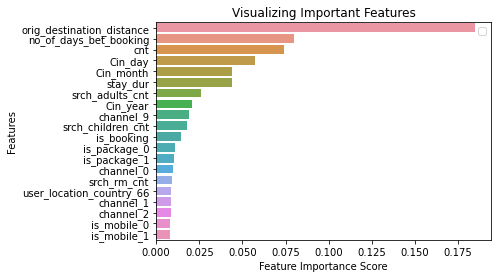

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_top20, y=feature_imp_top20.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Generating the Model on Selected Features

In [43]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X = user_train_df3[['orig_destination_distance', 'no_of_days_bet_booking', 'cnt', 'Cin_day',
       'stay_dur', 'Cin_month', 'srch_adults_cnt', 'Cin_year', 'channel_9',
       'srch_children_cnt', 'is_booking', 'is_package_0', 'is_package_1',
       'channel_0', 'channel_1', 'srch_rm_cnt', 'user_location_country_66',
       'channel_2', 'is_mobile_1', 'is_mobile_0']]  #
y = user_train_df3['hotel_cluster']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [44]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.15885714285714286


#### build KNN classifier model

In [45]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn.fit(train_features,train_labels)
#Predict the response for test dataset
y_pred = knn.predict(test_features)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.19376


### Conclusion